<a href="https://colab.research.google.com/github/Samin-Sadaf7/NN_works/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
data = pd.read_csv('/content/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

In [6]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [7]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.

In [8]:
_, m_train = X_train.shape

In [10]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def Softmax(Z):
  A = np.exp(Z)/ sum(np.exp(Z))
  return A

def Sigmoid(Z):
  A = 1/(1+np.exp(-Z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 =Softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Z):
  one_hot_Z = np.zeros((Z.size, Z.max()+1))
  one_hot_Z[np.arange(Z.size), Z] =1
  one_hot_Z = one_hot_Z.T
  return one_hot_Z

def deriv_ReLU(Z):
  return Z > 0

def deriv_Sigmoid(Z):
  return Sigmoid(Z)*(1-Sigmoid(Z))
def backward_prop(Z1, A1, Z2, A2, W1, W2,X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m* dZ2.dot(A1.T)
  db2 = 1/m *np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1- alpha*dW1
  b1 = db1 - alpha*db1
  W2 = W2 - alpha*dW2
  b2 = b2 - alpha*db2
  return W1, b1, W2, b2

In [11]:
def forward_prop_Sigmoid(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = Sigmoid(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = Softmax(Z2)
  return Z1, A1, Z2, A2

In [12]:
def backward_prop_Sigmoid(Z1, A1, Z2, A2, W1, W2,X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m* dZ2.dot(A1.T)
  db2 = 1/m *np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2)* deriv_Sigmoid(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return dW1, db1, dW2, db2

In [13]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    if i%10 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, Y))
  return W1, b1, W2, b2

In [19]:
def gradient_descent_Sigmoid(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop_Sigmoid(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop_Sigmoid(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    print("Itertation:" , i)
    predictions = get_predictions(A2)
    print(get_accuracy(predictions, Y))

  return W1, b1, W2, b2

In [24]:
W1, b1, W2, b2 = gradient_descent_Sigmoid(X_train, Y_train, 0.1, 2000)

Streaming output truncated to the last 5000 lines.
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6249268292682927
Itertation: 334
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6255609756097561
Itertation: 335
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.626219512195122
Itertation: 336
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6266341463414634
Itertation: 337
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6271951219512195
Itertation: 338
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6277073170731707
Itertation: 339
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6283414634146341
Itertation: 340
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6288048780487805
Itertation: 341
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6293658536585366
Itertation: 342
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6298536585365854
Itertation: 343
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6305609756097561
Itertation: 344
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.6310731707317073
Itertation: 345
[1 1 2 ... 0 0 6] [1 1 2 ... 0 5 6]
0.631609756097561
Itertation: 346
[1 1 2 ... 0 0 6] [1 1 2 ...

In [25]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_predictions(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Prediction:  [1]
Label:  1


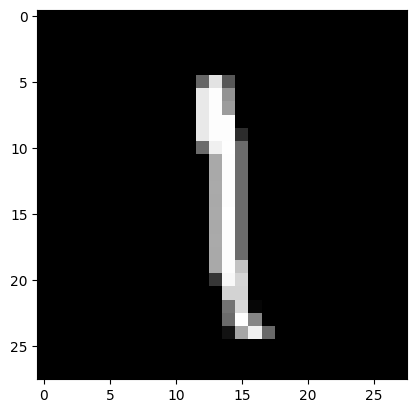

Prediction:  [1]
Label:  1


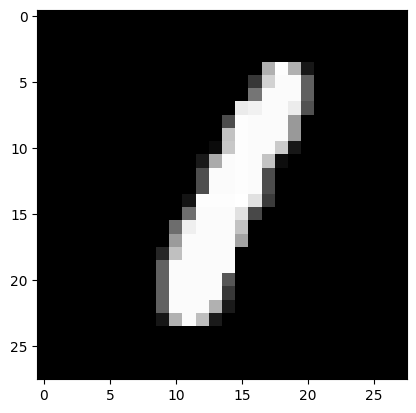

Prediction:  [2]
Label:  2


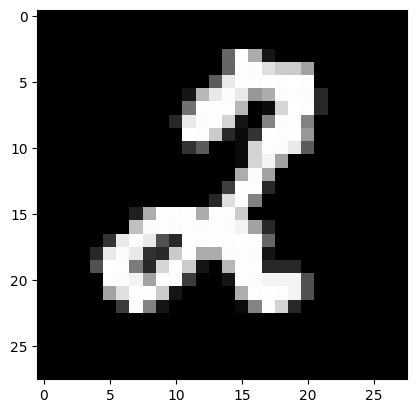

Prediction:  [2]
Label:  7


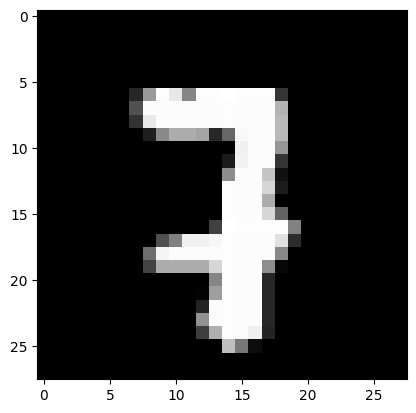

In [26]:
test_predictions(0, W1, b1, W2, b2)
test_predictions(1, W1, b1, W2, b2)
test_predictions(2, W1, b1, W2, b2)
test_predictions(3, W1, b1, W2, b2)

In [27]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 2 4 0 5 3 2 0 2 2 8 8 3 7 1 2 1 7 7 3 4 3 7 2 4 4 9 0 4 2 0 7 4 6 1 0 4
 6 8 5 2 0 1 6 0 0 9 9 7 4 2 4 0 9 6 8 6 1 2 1 7 0 2 7 7 8 1 1 4 7 7 6 5 8
 2 7 1 1 1 1 9 7 7 1 8 9 9 6 0 2 4 0 8 8 3 2 0 8 0 0 1 8 8 0 8 5 3 3 7 2 2
 0 8 1 7 0 8 2 0 9 2 2 9 5 4 2 6 0 1 2 7 0 4 7 5 0 0 8 0 1 2 3 2 1 0 6 7 1
 1 7 3 2 8 7 0 1 7 4 0 0 8 0 7 0 7 2 1 1 4 4 8 4 2 3 4 4 7 3 3 2 0 1 6 4 1
 0 1 6 1 2 6 5 9 0 7 9 0 2 2 2 3 2 5 6 8 8 9 7 0 7 0 1 4 6 2 4 2 2 7 5 3 8
 1 1 4 0 3 9 5 7 3 7 1 4 7 8 8 0 8 4 7 8 1 2 9 4 4 5 6 9 5 5 7 1 7 4 9 6 4
 4 3 7 6 8 7 1 6 7 3 6 8 8 2 7 4 6 7 9 2 9 4 2 0 6 0 2 2 2 1 2 8 0 7 2 2 6
 2 7 2 8 1 8 0 1 2 1 0 0 1 8 0 6 4 4 6 2 1 6 0 0 7 1 8 1 1 4 8 3 1 5 0 7 0
 7 3 6 5 2 6 6 2 3 7 1 6 2 0 9 8 7 9 3 5 2 6 2 2 5 0 0 6 0 6 2 9 0 2 4 1 1
 9 4 0 6 7 5 1 1 3 0 6 0 7 0 1 1 8 9 7 0 9 6 4 0 0 7 2 8 7 5 7 1 0 3 1 8 1
 0 4 6 1 4 8 9 7 5 7 2 6 8 4 3 1 4 4 1 0 0 8 7 7 5 2 7 6 5 2 5 8 7 4 0 6 2
 7 7 1 7 6 4 4 7 5 8 0 5 0 4 8 0 2 3 2 3 4 3 8 7 0 6 7 5 9 1 5 6 6 2 3 2 7
 7 5 1 2 2 4 3 0 7 4 7 4 

0.76